In [ ]:
!pip install pmdarima

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from pmdarima.arima import ndiffs, nsdiffs
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline
# Set Pandas option to display all columns
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/full_table_DS.csv', sep = ';', encoding = 'utf-8')

In [ ]:
df.head()

,id_yearweek,date,value_sales,sell_price,event,Category,Department,Product,Region,Store,yearweek
0,ACCESORIES_1_009_NYC_1_201105,2011-01-31,7,2.07,NoEvent,ACCESORIES,1,9,NYC,1,201105
1,ACCESORIES_1_010_NYC_1_201105,2011-01-31,1,4.22,NoEvent,ACCESORIES,1,10,NYC,1,201105
2,ACCESORIES_1_016_NYC_1_201105,2011-01-31,3,0.93,NoEvent,ACCESORIES,1,16,NYC,1,201105
3,ACCESORIES_1_022_NYC_1_201105,2011-01-31,1,9.12,NoEvent,ACCESORIES,1,22,NYC,1,201105
4,ACCESORIES_1_029_NYC_1_201105,2011-01-31,3,9.90,NoEvent,ACCESORIES,1,29,NYC,1,201105


In [ ]:
(df['value_sales'] == 0).sum()

0

In [ ]:
df['product_store'] = df['id_yearweek'].str.slice(stop=-7)

In [ ]:
# Converter a coluna 'date' para o tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar o DataFrame de forma descendente por 'date'
df_sorted = df.sort_values(by='date', ascending=False)

# Seleção da Região e Categoria

In [ ]:
df_sorted['Category'].unique()

array(['SUPERMARKET', 'HOME&GARDEN', 'ACCESORIES'], dtype=object)

In [ ]:
df_sorted['Region'].unique()

array(['NYC', 'BOS', 'PHI'], dtype=object)

In [ ]:
var1 = 'PHI'
var2 = 'SUPERMARKET'

In [ ]:
df_grouped = df_sorted[df_sorted['date'].dt.year >= 2015]
df_grouped = df_grouped.query(f"Region=='{var1}' & Category=='{var2}'").reset_index()

In [ ]:
df_grouped.head().T

,0,1,2,3,4
index,18429218,18429207,18429208,18429209,18429210
id_yearweek,SUPERMARKET_3_128_PHI_2_201616,SUPERMARKET_3_093_PHI_2_201616,SUPERMARKET_3_099_PHI_2_201616,SUPERMARKET_3_107_PHI_2_201616,SUPERMARKET_3_109_PHI_2_201616
date,2016-04-24 00:00:00,2016-04-24 00:00:00,2016-04-24 00:00:00,2016-04-24 00:00:00,2016-04-24 00:00:00
value_sales,3,9,12,1,38
sell_price,3.58,2.26,3.07,2.98,1.2
event,NoEvent,NoEvent,NoEvent,NoEvent,NoEvent
Category,SUPERMARKET,SUPERMARKET,SUPERMARKET,SUPERMARKET,SUPERMARKET
Department,3,3,3,3,3
Product,128,93,99,107,109
Region,PHI,PHI,PHI,PHI,PHI


In [ ]:
# Agrupar os valores de 'value_sales' por 'date' e fazer a média, renomeando a coluna resultante para 'value'
serie_soma_value = df_grouped.groupby('date')['value_sales'].sum().reset_index(name='value')

In [ ]:
# Definir 'date' como índice

serie_soma_value.set_index('date', inplace=True)

In [ ]:
# kpss test

ndiffs(serie_soma_value, test='kpss')

1

In [ ]:
# augmented dickey-fuller

ndiffs(serie_soma_value, test='adf')

0

In [ ]:
# testes para sazonalidade

nsdiffs(serie_soma_value, test='ocsb', m=12)

0

In [ ]:
nsdiffs(serie_soma_value, test='ch', m=12)

0

In [ ]:
# Agora, vamos agrupar os dados diários em uma série temporal de vendas diárias

time_series = serie_soma_value['value'].resample('D').sum()

In [ ]:
time_series.head()

date
2015-01-01    5123
2015-01-02    9196
2015-01-03    9624
2015-01-04    7912
2015-01-05    7846
Freq: D, Name: value, dtype: int64

# modelo ARIMA

In [ ]:
# Aqui, estou usando ARIMA(0,0,1) como exemplo
order = (0, 0, 1)
model = ARIMA(time_series, order=order)

# Ajuste do modelo aos dados
model_fit = model.fit()

# Previsão dos próximos 28 dias
forecast = model_fit.forecast(steps=28)

# Imprimir as previsões
print("Previsões para os próximos 28 dias:")
print(forecast)

Previsões para os próximos 28 dias:
2016-04-25    8498.159587
2016-04-26    7840.584758
2016-04-27    7840.584758
2016-04-28    7840.584758
2016-04-29    7840.584758
2016-04-30    7840.584758
2016-05-01    7840.584758
2016-05-02    7840.584758
2016-05-03    7840.584758
2016-05-04    7840.584758
2016-05-05    7840.584758
2016-05-06    7840.584758
2016-05-07    7840.584758
2016-05-08    7840.584758
2016-05-09    7840.584758
2016-05-10    7840.584758
2016-05-11    7840.584758
2016-05-12    7840.584758
2016-05-13    7840.584758
2016-05-14    7840.584758
2016-05-15    7840.584758
2016-05-16    7840.584758
2016-05-17    7840.584758
2016-05-18    7840.584758
2016-05-19    7840.584758
2016-05-20    7840.584758
2016-05-21    7840.584758
2016-05-22    7840.584758
Freq: D, Name: predicted_mean, dtype: float64


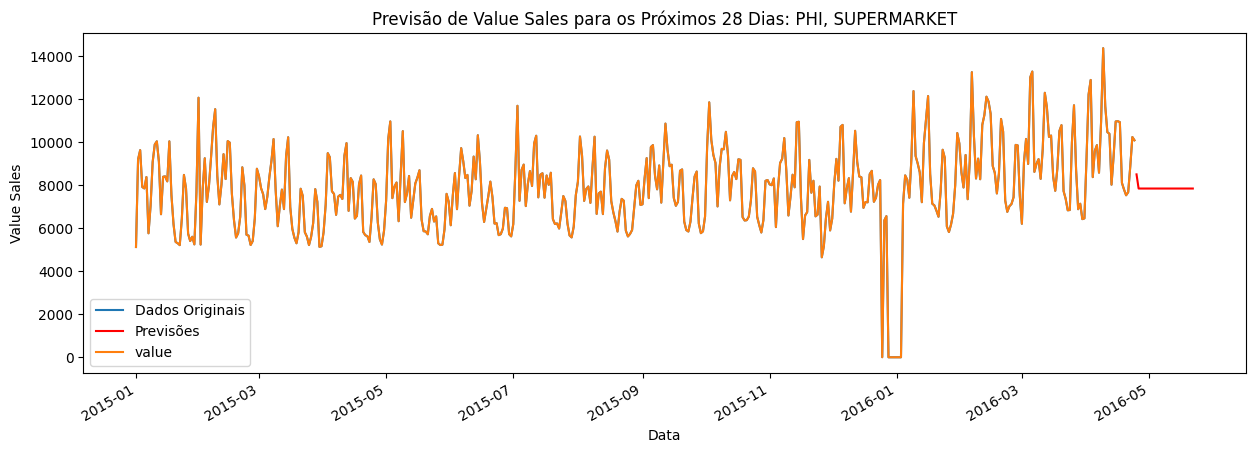

In [ ]:
# Plote os dados originais
plt.plot(time_series, label='Dados Originais')

# Plote as previsões
plt.plot(model_fit.forecast(steps=28), label='Previsões', color='red')

# Configurar o tamanho da figura (largura x altura)
time_series.plot(figsize=(15, 5))

# Adicione legendas e rótulos
plt.xlabel('Data')
plt.ylabel('Value Sales')
plt.title(f'Previsão de Value Sales para os Próximos 28 Dias: {var1}, {var2}')
plt.legend()

# Exiba o gráfico
plt.show()

In [ ]:
time_series.head()

date
2015-01-01    5123
2015-01-02    9196
2015-01-03    9624
2015-01-04    7912
2015-01-05    7846
Freq: D, Name: value, dtype: int64

In [ ]:
# divisao entre treino e validacao
from sklearn.model_selection import train_test_split

train, test = train_test_split(serie_soma_value, shuffle=False, test_size=0.2)

In [ ]:
import pmdarima as pm

model = pm.auto_arima(train, m=4, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=6509.443, Time=1.59 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=6638.535, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=6513.191, Time=0.35 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=6513.614, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=7850.166, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[4] intercept   : AIC=6505.485, Time=0.61 sec
 ARIMA(2,0,2)(0,0,0)[4] intercept   : AIC=6512.228, Time=0.32 sec
 ARIMA(2,0,2)(0,0,2)[4] intercept   : AIC=6507.445, Time=0.91 sec
 ARIMA(2,0,2)(1,0,0)[4] intercept   : AIC=6504.638, Time=1.38 sec
 ARIMA(2,0,2)(2,0,0)[4] intercept   : AIC=6515.089, Time=4.01 sec
 ARIMA(2,0,2)(2,0,1)[4] intercept   : AIC=6511.280, Time=4.30 sec
 ARIMA(1,0,2)(1,0,0)[4] intercept   : AIC=6505.428, Time=1.53 sec
 ARIMA(2,0,1)(1,0,0)[4] intercept   : AIC=6515.356, Time=1.72 sec
 ARIMA(3,0,2)(1,0,0)[4] intercept   : AIC=6518.658, Time=1.74 sec
 ARIMA(2,0,3)(1,0,0)[4] intercept

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  378
Model:             SARIMAX(3, 0, 0)x(1, 0, 0, 4)   Log Likelihood               -3243.565
Date:                           Sat, 18 May 2024   AIC                           6499.129
Time:                                   13:40:31   BIC                           6522.738
Sample:                                        0   HQIC                          6508.499
                                           - 378                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3775.4870    591.534      6.383      0.000    2616.101    4934.873
ar.L1          0.5665      0.040     14.172      0.000       0.488       0.645
ar.L2         -0.1702      0.059     -2.877      0.004      -0.286      -0.054
ar.L3          0.2231      0.063      3.519      0.000       0.099       0.347
ar.S.L4       -0.2959      0.071     -4.143      0.000      -0.436      -0.156
sigma2       1.73e+06   8.12e+04     21.296      0.000    1.57e+06    1.89e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               239.22
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.40
Prob(H) (two-sided):                  0.25   Kurtosis:                         6.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

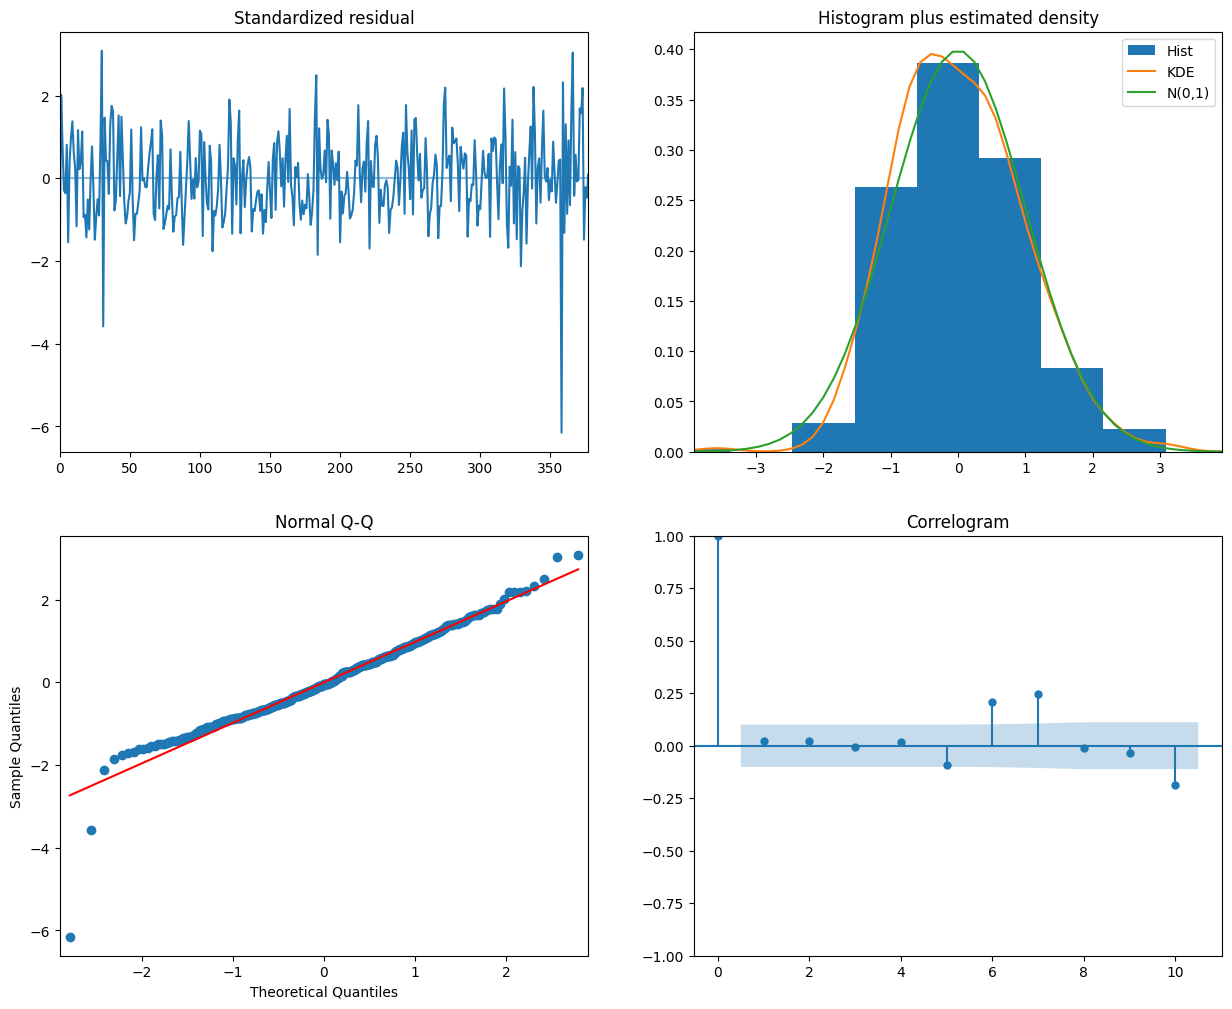

In [ ]:
plot=model.plot_diagnostics(figsize=(15, 12))

In [ ]:
forecasts = model.predict(95)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
train

,value
date,
2015-01-01,5123
2015-01-02,9196
2015-01-03,9624
2015-01-04,7912
2015-01-05,7846
...,...
2016-01-16,12137
2016-01-17,8509
2016-01-18,7134


In [ ]:
forecasts

378    7643.617868
379    7955.047139
380    7981.973185
381    8017.975874
382    7730.383906
          ...     
468    7655.475879
469    7655.475879
470    7655.475879
471    7655.475879
472    7655.475879
Length: 95, dtype: float64

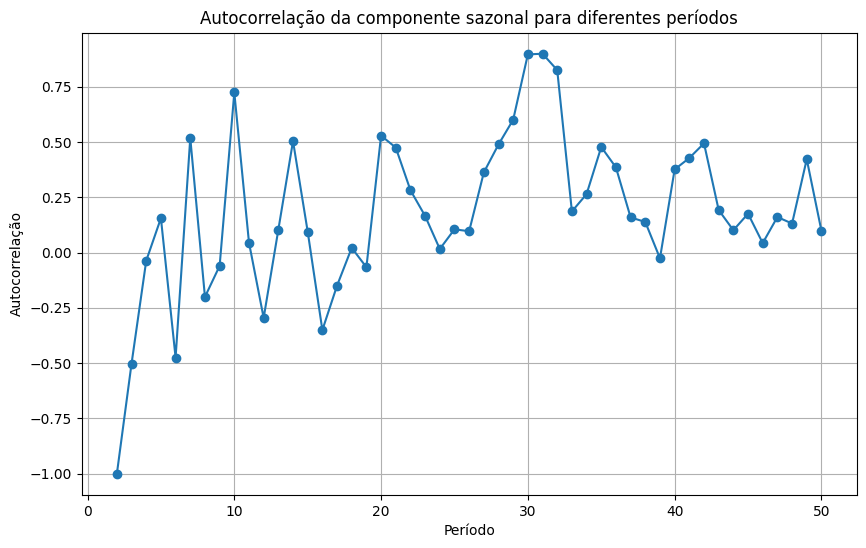

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Supondo que 'train' seja um DataFrame do pandas com uma coluna chamada 'value' que contém os seus dados

# Realize a análise de decomposição sazonal para diferentes períodos
max_period = 50  # Período máximo a ser testado
results = {}
for period in range(1, max_period + 1):
    result = seasonal_decompose(train['value'], model='additive', period=period)
    seasonal = result.seasonal
    seasonal = seasonal.dropna()
    autocorr = seasonal.autocorr()
    results[period] = autocorr

# Plot da autocorrelação para diferentes períodos
plt.figure(figsize=(10, 6))
plt.plot(results.keys(), results.values(), marker='o', linestyle='-')
plt.title('Autocorrelação da componente sazonal para diferentes períodos')
plt.xlabel('Período')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.show()


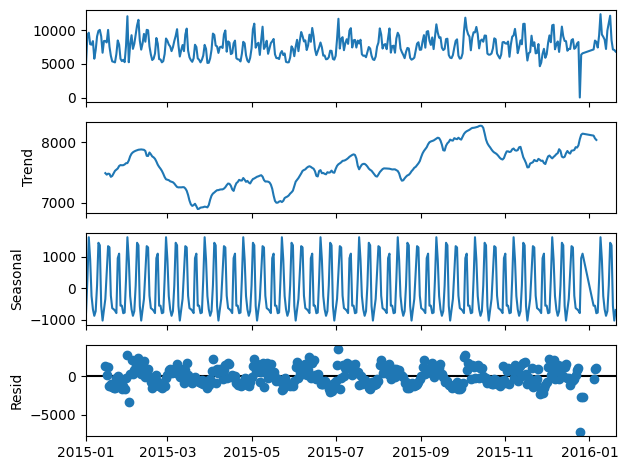

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train,
                            model='additive',
                            period=28)

plt = result.plot()

# Avaliação do modelo

In [ ]:
from sklearn.metrics import mean_absolute_error

y_true = test['value']
y_pred = forecasts

mae = mean_absolute_error(y_true, y_pred)
print(mae)

1908.8743742879788


In [ ]:
from sklearn.metrics import mean_squared_error

y_true = test['value']
y_pred = forecasts

mae = mean_squared_error(y_true, y_pred)
print(mae)

5905906.50245214


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
def error_score(y_test, y_pred):
    test_r2 = r2_score(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_pred)
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)

    print("R2: {}".format(test_r2))
    print("MAE: {}".format(test_mae))
    print("MAPE: {}".format(test_mape))
    print("MSE: {}".format(test_mse))
    print("RMSE: {}".format(test_rmse))

In [ ]:
y_true = test['value']
y_pred = forecasts
error_score(y_true, y_pred)

R2: -0.6702989047705614
MAE: 1908.8743742879788
MAPE: 0.188549573532326
MSE: 5905906.50245214
RMSE: 2430.2070904456145


"Quando o resultado do teste KPSS é 1, isso indica que a série é estacionária, ou seja, não possui tendência ou padrões sistemáticos ao longo do tempo. Isso significa que a média, a variância e a autocovariância da série não mudam significativamente com o tempo. Em resumo, um resultado de 1 no teste KPSS sugere que a série é estacionária em torno de uma constante."

In [ ]:
# heterocedastidade
from heteroskedasticity import het_tests

p_value = het_tests(serie_soma_value, test='white')
# p_value = het_tests(series, test='breuschpagan')

p_value

ModuleNotFoundError: No module named 'heteroskedasticity'

O teste de heterocedasticidade é utilizado para verificar se a variância dos erros em um modelo de regressão é constante (homocedasticidade) ou variável (heterocedasticidade) ao longo das observações. Heterocedasticidade ocorre quando a variabilidade dos erros é diferente em diferentes níveis das variáveis independentes. Detectar heterocedasticidade é importante porque sua presença pode invalidar as inferências estatísticas de um modelo de regressão, afetando testes de hipótese e intervalos de confiança.

In [ ]:
# removendo a tendencia
train.diff(periods=1).plot()

In [ ]:
# removendo a sazonalidade
train.diff(periods=4).plot()

In [ ]:
# residuos
train.diff(periods=1).diff(periods=4).plot()